### TASK 0: IMPORT OF REQUIRED LIBRARIES

In [3]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import skimage as ski
from skimage import transform
from matplotlib_scalebar.scalebar import ScaleBar 


### DATASET

**TASKS**
1) Read in the image and visualize slices in 3 different planes
2) Find your phantom and crop it out
3) Find an object within your phantom

NB: The image needs to be fliped and rotated to match the orientation of the radiological convention 

##### **Useful functions and hints**

**Loading a nifti file:**

Nibabel does not load the image array from the proxy when you load the image. It waits until you ask for the array data. The standard way to ask for the array data is to call the 
get_fdata() method:

- `img = nib.load('imgFile')`
- `data = img.get_fdata()`
- `info = img.header`

**Usefull functions for visualization:**
 - `np.flipud(np.fliplr()) to flip the image`
 - `plt.imshow() to visualize an image`
 - `ski.transform.rotate(img_plane,rot angle,resize=True) to rotate the image`
 - `plt.subplot() to generate subplots` 
 - `plt.colorbar() to add a colorbar`

**Hint to visulaizing the image in the radiological view**

- Flip the image\
`img_flip  = np.flipud(np.fliplr(data))`

- Get the right axis on the image\
`shape = img_flip.shape`\
`extent_axi = [0,shape[0],shape[1],0]`\
`extent_cor = [0,shape[0],0,shape[2]]`\
`extent_sag = [0,shape[1],0,shape[2]]`\

- Define slices\
`axial_slc = ...`\
`coronal_slc = ...`\
`sagittal_slc = ...`

- Rotate the image\
`rot_angle = 90`\
`img_plot_axi  = np.flipud(ski.transform.rotate(img_flip[:,:,axial_slc],rot_angle,resize=True))`\
`img_plot_cor  = ski.transform.rotate(img_flip[:,coronal_slc,:],rot_angle,resize=True)`\
`img_plot_sag  = ski.transform.rotate(img_flip[sagittal_slc,:,:],rot_angle,resize=True)`

- Plotting parameters\
`figsize_x = ...`, `figsize_y = ...`\
`rows = ...`, `columns = ...`\
`cmap = ...`

- Plot the image

`fig = plt.figure(figsize=(figsize_x,figsize_y)) `
 
 Axial plane\
`fig.add_subplot(rows, columns, 1)`\
`plt.title('Axial')`\
`figax = plt.imshow(img_plot_axi, cmap=cmap, extent=extent_axi)`\
`plt.xlabel('R-L [pixels]')`\
`plt.ylabel('A-P [pixels]')`
 
 Coronal plane\
`fig.add_subplot(rows, columns, 2)`\
`plt.title('Coronal')`\
`figax = plt.imshow(img_plot_cor, cmap=cmap, extent=extent_cor)`\
`plt.ylabel('S-I [pixel]')`\
`plt.xlabel('R-L [pixel]')`

 Sagittal plane\
`fig.add_subplot(rows, columns, 3)`\
`plt.title('Sagittal')`\
`figax = plt.imshow(img_plot_sag, cmap=cmap, extent=extent_sag)`\
`plt.ylabel('S-I [pixel]')`\
`plt.xlabel('A-P [pixel]')`\

`fig.tight_layout()`\
`plt.show()`


In [4]:
# Read Nifti file

full_path = r"C:\Users\leali\Documents\5_Semester\Billed_dannelse\Billeddannelse\Dtu - CT BBH_CT_Lavdosis_BH_1.25mm_20240923083332_2 (2).nii"

img = nib.load(full_path)
data = img.get_fdata()
header = img.header



### Crop image to get object 1

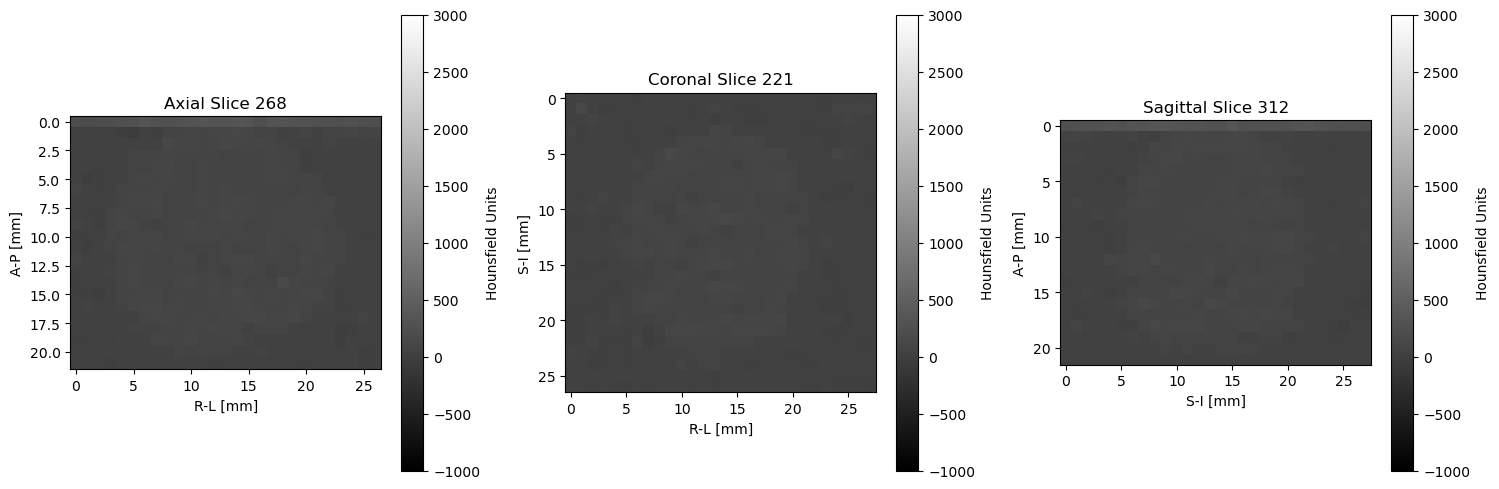

In [5]:
# Plot one slice of your image and add a colorbar to investigate the intensity values

# Crop image to get your phantom
coronal_slice_phantom = 221 
sagittal_slice_phantom = 312 
axial_slice_phantom = 268 

# Visualize one slice in all three directions
data_flipped = np.flipud(np.fliplr(data))

# Plot the slices with colorbars
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (view from top, z-plane)
axial_data_rotated = ski.transform.rotate(
    data_flipped[298:325, 208:230, axial_slice_phantom], angle=270, resize=True
)

axial_img = ax[0].imshow(axial_data_rotated, cmap='gray',vmin=-1000, vmax=3000)
ax[0].set_title(f'Axial Slice {axial_slice_phantom}')
fig.colorbar(axial_img, ax=ax[0], label='Hounsfield Units')
ax[0].set_xlabel('R-L [mm]')
ax[0].set_ylabel('A-P [mm]')

# Coronal view (view from front, y-plane)
coronal_img = ax[1].imshow(data_flipped[298:325, coronal_slice_phantom, 257:285], cmap='gray', vmin=-1000, vmax=3000)
ax[1].set_title(f'Coronal Slice {coronal_slice_phantom}')
fig.colorbar(coronal_img, ax=ax[2], label='Hounsfield Units')
ax[1].set_xlabel('R-L [mm]')
ax[1].set_ylabel('S-I [mm]')

# Sagittal view (view from side, x-plane)
sagittal_img = ax[2].imshow(data_flipped[sagittal_slice_phantom, 208:230,  257:285], cmap='gray', vmin=-1000, vmax=3000)
ax[2].set_title(f'Sagittal Slice {sagittal_slice_phantom}')
fig.colorbar(sagittal_img, ax=ax[1], label='Hounsfield Units')
ax[2].set_ylabel('A-P [mm]')
ax[2].set_xlabel('S-I [mm]')

plt.tight_layout()
plt.show()

### Histograms


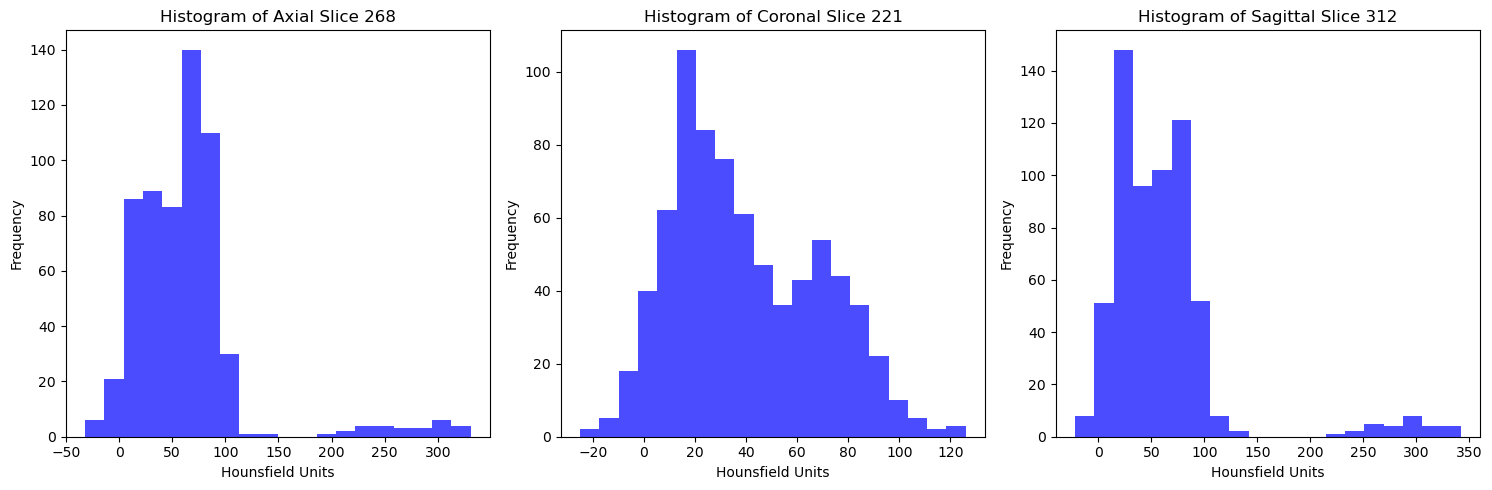

In [6]:
# Extract the slices for each view
axial_slice = data_flipped[298:325, 208:230, axial_slice_phantom]
coronal_slice = data_flipped[298:325, coronal_slice_phantom, 257:285]
sagittal_slice = data_flipped[sagittal_slice_phantom, 208:230, 257:285]


# Flatten the slices for histogram plotting
axial_data = axial_slice.flatten()
coronal_data = coronal_slice.flatten()
sagittal_data = sagittal_slice.flatten()

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Axial histogram
ax[0].hist(axial_data, bins=20, color='blue', alpha=0.7)
ax[0].set_title(f'Histogram of Axial Slice {axial_slice_phantom}')
ax[0].set_xlabel('Hounsfield Units')
ax[0].set_ylabel('Frequency')

# Coronal histogram
ax[1].hist(coronal_data, bins=20, color='blue', alpha=0.7)
ax[1].set_title(f'Histogram of Coronal Slice {coronal_slice_phantom}')
ax[1].set_xlabel('Hounsfield Units')
ax[1].set_ylabel('Frequency')

# Sagittal histogram
ax[2].hist(sagittal_data, bins=20, color='blue', alpha=0.7)
ax[2].set_title(f'Histogram of Sagittal Slice {sagittal_slice_phantom}')
ax[2].set_xlabel('Hounsfield Units')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Window-leveling 

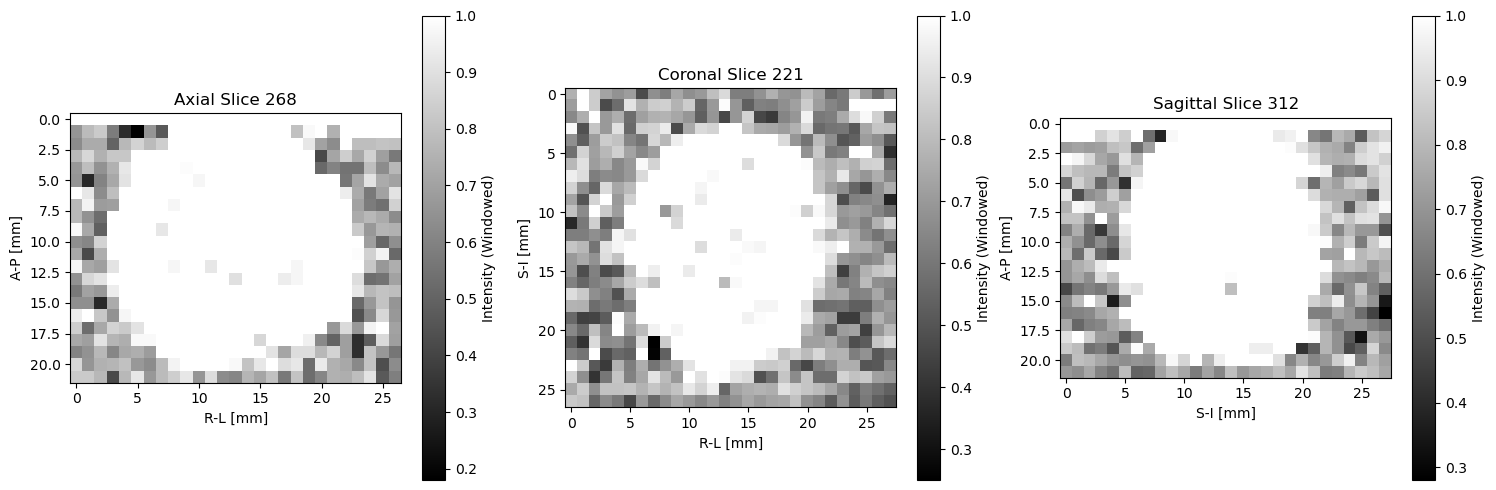

In [7]:
# Define window-level parameters
center = 0
window = 100
lower_bound = center - window / 2
upper_bound = center + window / 2

def apply_window_level(data, lower_bound, upper_bound):
    """Apply window-leveling to the data."""
    data_clipped = np.clip(data, lower_bound, upper_bound)  # Clip data to the window range
    data_normalized = (data_clipped - lower_bound) / (upper_bound - lower_bound)  # Normalize to [0, 1]
    return data_normalized

# Crop image to get your phantom
coronal_slice_phantom = 221 
sagittal_slice_phantom = 312 
axial_slice_phantom = 268 

# Flip data for visualization
data_flipped = np.flipud(np.fliplr(data))

# Apply window-leveling to the data slices
axial_data = apply_window_level(data_flipped[298:325, 208:230, axial_slice_phantom], lower_bound, upper_bound)
coronal_data = apply_window_level(data_flipped[298:325, coronal_slice_phantom, 257:285], lower_bound, upper_bound)
sagittal_data = apply_window_level(data_flipped[sagittal_slice_phantom, 208:230, 257:285], lower_bound, upper_bound)

# Plot the slices with colorbars
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (view from top, z-plane)
axial_data_rotated = ski.transform.rotate(axial_data, angle=270, resize=True)
axial_img = ax[0].imshow(axial_data_rotated, cmap='gray')
ax[0].set_title(f'Axial Slice {axial_slice_phantom}')
fig.colorbar(axial_img, ax=ax[0], label='Intensity (Windowed)')
ax[0].set_xlabel('R-L [mm]')
ax[0].set_ylabel('A-P [mm]')

# Coronal view (view from front, y-plane)
coronal_img = ax[1].imshow(coronal_data, cmap='gray')
ax[1].set_title(f'Coronal Slice {coronal_slice_phantom}')
fig.colorbar(coronal_img, ax=ax[1], label='Intensity (Windowed)')
ax[1].set_xlabel('R-L [mm]')
ax[1].set_ylabel('S-I [mm]')

# Sagittal view (view from side, x-plane)
sagittal_img = ax[2].imshow(sagittal_data, cmap='gray')
ax[2].set_title(f'Sagittal Slice {sagittal_slice_phantom}')
fig.colorbar(sagittal_img, ax=ax[2], label='Intensity (Windowed)')
ax[2].set_ylabel('A-P [mm]')
ax[2].set_xlabel('S-I [mm]')

plt.tight_layout()
plt.show()

### Calculations

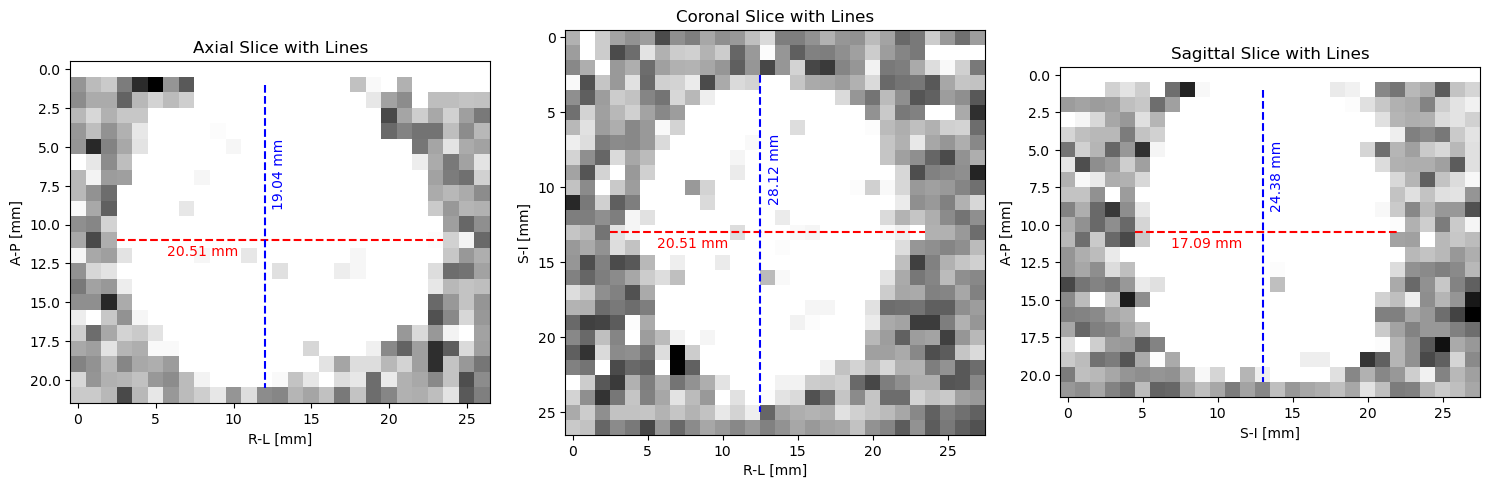

In [8]:
# Get voxel dimensions (in mm)
voxel_dimensions = img.header.get_zooms()[:3]  # (x, y, z)

# Define line coordinates for each slice
# Adjust these coordinates as needed
horizontal_start_axial = (2.5,11)
horizontal_end_axial = (23.5, 11)
vertical_start_axial = (12, 1)
vertical_end_axial = (12, 20.5)

horizontal_start_coronal = (2.5, 13)
horizontal_end_coronal = (23.5, 13)
vertical_start_coronal = (12.5, 2.5)
vertical_end_coronal = (12.5, 25)

horizontal_start_sagittal = (4.5, 10.5)
horizontal_end_sagittal = (22, 10.5)
vertical_start_sagittal = (13, 1)
vertical_end_sagittal = (13, 20.5)

# Create a figure with subplots for axial, coronal, and sagittal views
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Axial Slice
axes[0].imshow(axial_data_rotated, cmap='gray')
axes[0].set_title('Axial Slice with Lines')
axes[0].set_xlabel('R-L [mm]')
axes[0].set_ylabel('A-P [mm]')
# Add lines to axial view
axes[0].plot([horizontal_start_axial[0], horizontal_end_axial[0]], [horizontal_start_axial[1], horizontal_end_axial[1]], 
             color='red', linestyle='--', linewidth=1.5)
axes[0].plot([vertical_start_axial[0], vertical_end_axial[0]], [vertical_start_axial[1], vertical_end_axial[1]], 
             color='blue', linestyle='--', linewidth=1.5)
# Add length annotations
horizontal_length_axial = np.sqrt((horizontal_end_axial[0] - horizontal_start_axial[0]) ** 2) * voxel_dimensions[0]
vertical_length_axial = np.sqrt((vertical_end_axial[1] - vertical_start_axial[1]) ** 2) * voxel_dimensions[1]
axes[0].text(((horizontal_start_axial[0] + horizontal_end_axial[0]) / 2)-5, (horizontal_start_axial[1] + 0.5)+0.5, 
             f'{horizontal_length_axial:.2f} mm', color='red', fontsize=10, ha='center')
axes[0].text((vertical_start_axial[0] + 0.5), ((vertical_start_axial[1] + vertical_end_axial[1]) / 2)-4, 
             f'{vertical_length_axial:.2f} mm', color='blue', fontsize=10, rotation=90, va='center')

# Plot Coronal Slice
axes[1].imshow(coronal_data, cmap='gray')
axes[1].set_title('Coronal Slice with Lines')
axes[1].set_xlabel('R-L [mm]')
axes[1].set_ylabel('S-I [mm]')
# Add lines to coronal view
axes[1].plot([horizontal_start_coronal[0], horizontal_end_coronal[0]], [horizontal_start_coronal[1], horizontal_end_coronal[1]], 
             color='red', linestyle='--', linewidth=1.5)
axes[1].plot([vertical_start_coronal[0], vertical_end_coronal[0]], [vertical_start_coronal[1], vertical_end_coronal[1]], 
             color='blue', linestyle='--', linewidth=1.5)
# Add length annotations
horizontal_length_coronal = np.sqrt((horizontal_end_coronal[0] - horizontal_start_coronal[0]) ** 2) * voxel_dimensions[0]
vertical_length_coronal = np.sqrt((vertical_end_coronal[1] - vertical_start_coronal[1]) ** 2) * voxel_dimensions[2]
axes[1].text(((horizontal_start_coronal[0] + horizontal_end_coronal[0]) / 2)-5, (horizontal_start_coronal[1] + 0.5)+0.5, 
             f'{horizontal_length_coronal:.2f} mm', color='red', fontsize=10, ha='center')
axes[1].text(vertical_start_coronal[0] + 0.5, ((vertical_start_coronal[1] + vertical_end_coronal[1]) / 2)-5, 
             f'{vertical_length_coronal:.2f} mm', color='blue', fontsize=10, rotation=90, va='center')

# Plot Sagittal Slice
axes[2].imshow(sagittal_data, cmap='gray')
axes[2].set_title('Sagittal Slice with Lines')
axes[2].set_ylabel('A-P [mm]')
axes[2].set_xlabel('S-I [mm]')
# Add lines to sagittal view
axes[2].plot([horizontal_start_sagittal[0], horizontal_end_sagittal[0]], [horizontal_start_sagittal[1], horizontal_end_sagittal[1]], 
             color='red', linestyle='--', linewidth=1.5)
axes[2].plot([vertical_start_sagittal[0], vertical_end_sagittal[0]], [vertical_start_sagittal[1], vertical_end_sagittal[1]], 
             color='blue', linestyle='--', linewidth=1.5)
# Add length annotations
horizontal_length_sagittal = np.sqrt((horizontal_end_sagittal[0] - horizontal_start_sagittal[0]) ** 2) * voxel_dimensions[1]
vertical_length_sagittal = np.sqrt((vertical_end_sagittal[1] - vertical_start_sagittal[1]) ** 2) * voxel_dimensions[2]
axes[2].text(((horizontal_start_sagittal[0] + horizontal_end_sagittal[0]) / 2)-4, (horizontal_start_sagittal[1] + 0.5)+0.5, 
             f'{horizontal_length_sagittal:.2f} mm', color='red', fontsize=10, ha='center')
axes[2].text(vertical_start_sagittal[0] + 0.5, ((vertical_start_sagittal[1] + vertical_end_sagittal[1]) / 2)-4, 
             f'{vertical_length_sagittal:.2f} mm', color='blue', fontsize=10, rotation=90, va='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [177]:
# Volume


# Gennemsnitlig radius
d_avg = np.mean([21.00, 19.50, 21.00, 22.50, 17.50, 19.50])

print(d_avg)


20.166666666666668
